# Regions of the World

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import seaborn as sns

In [7]:
df = pd.read_csv('../data/norm_change.csv').drop(columns='Unnamed: 0')

In [8]:
pop = pd.read_csv('../data/pop_clean.csv', index_col=0)
le = pd.read_csv('../data/le_clean.csv', index_col= 0)
gni = pd.read_csv('../data/gni_clean.csv', index_col= 0)

Second goal: Can we determine what part of the world these countries best belong to by comparing their normalized changes in life expectancy anc GNI per capita with the values in possible regions?

Countries with unclear regions:
* Cyprus -- either Europe or the Middle East
* Mongolia -- central asia or east asia
* Turkey -- either the Middle East or Eastern Ruep middle east or eastern europe + Russia
* Timor-Leste -- eith Oceania or Southeast Asia
* Egypt, Sudan -- either north Africa or the Middle East
* South Sudan -- either North or East Africa
* Comoros, Malawi, Mauritius, Zambia, and/or Zimbabwe -- are each sometimes in Southern or East Africa (and not necessarily all of them)
* Madagascar -- somewhere in East Africa, south Africa, the Middle East, or South Asia
* Angola -- either Southern or Central Africa

In [9]:
# Continents
north_america = ['Canada', 'United States', 'Mexico']
south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 
                 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
central_america = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']
caribbean = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Cuba', 'Dominica', 'Dominican Republic', 
             'Grenada', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 
             'Trinidad and Tobago']
europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
          'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 
          'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 
          'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenergo', 'Netherlands', 
          'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 
          'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Turkey', 'Ukraine', 'United Kingdom', 'Holy See']
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde',
          'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Dijbouti',
          'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
          'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
          'Marutitius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
          'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
          'Uganda', 'Zambia', 'Zimbabwe']
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China',
        'Cyprus', 'Egypt', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan'
        'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 
        'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 
        'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 
        'Vietnam', 'Yemen']
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru', 'New Zealand', 
           'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

In [10]:
# world regions
western_europe = ['Andorra', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
                  'Iceland', 'Ireland', 'Italy', 'Liechtenstein', 'Luxembourg', 'Monaco', 'Netherlands', 'Norway', 
                  'Portugal', 'San Marino', 'Spain', 'Sweden', 'United Kingdom', 'Holy See']
eastern_europe_russia = ['Albania', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 
                         'Estonia', 'Hungary', 'Kosovo', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenergo',
                         'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovak Republic', 'Slovenia', 
                         'Turkey', 'Ukraine']
central_asia = ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan']
east_asia = ['China', 'Japan', 'Singapore', 'South Korea']
south_asia = ['Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
southeast_asia = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand', 'Vietnam']
middle_east = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Georgia', 'Iran', 'Iraq', 'Israel', 'Jordan', 
               'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 
               'Yemen']
north_africa = ['Algeria', 'Libya', 'Morocco', 'Tunisia'] 
west_africa = ['Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 
               'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
central_africa = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 
                  'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']
southern_africa = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa']
east_africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Malawi', 'Madagascar', 'Mauritius', 
               'Mozambique', 'Rwanda', 'Somalia', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']
english_north_america = ['Canada', 'United States']
mesoamerica = ['Mexico'] + central_america
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru', 'New Zealand', 
           'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

### Cyprus: Europe or Middle East

In [11]:
df[df['country']=='Cyprus']

,country,norm_pop,norm_le,norm_gni
144,Cyprus,6.268544,1.323896,60.968895


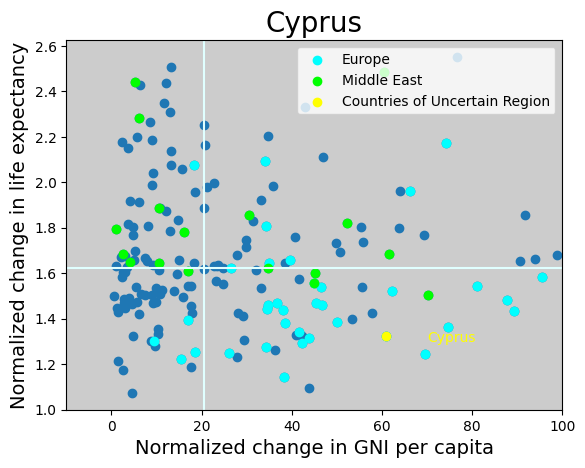

In [12]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])
plt.scatter(x=df[df['country'].isin(europe)]['norm_gni'], 
            y= df[df['country'].isin(europe)]['norm_le'], 
            color='cyan',
            label='Europe')
plt.scatter(x=df[df['country'].isin(middle_east)]['norm_gni'], 
            y= df[df['country'].isin(middle_east)]['norm_le'], 
            color='lime', 
            label='Middle East')
plt.scatter(x=df[df['country'].isin(['Cyprus'])]['norm_gni'], 
            y= df[df['country'].isin(['Cyprus'])]['norm_le'], 
            color='yellow',
           label='Countries of Uncertain Region')

plt.annotate('Cyprus', xy= (67, 1.3), xytext= (70,1.3), color='yellow')

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Cyprus', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/cyprus.png')

plt.show()
plt.close(fig)

Cyprus appears to be behaving more like the other European countries, however this not a super clear case because of the overlap between the regional groups.

### Mongolia: Central or East Asia

I also included Eastern Europe and Russia since Mongolia is right next to Russia. 

In [13]:
df[df['country']=='Mongolia']

,country,norm_pop,norm_le,norm_gni
109,Mongolia,7.574596,1.505818,7.41985


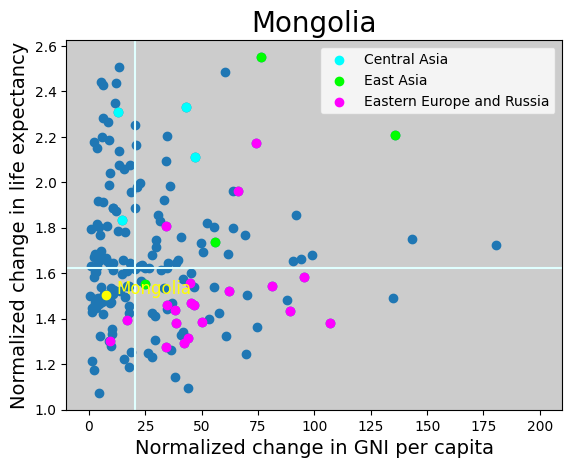

In [14]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(central_asia)]['norm_gni'], 
            y= df[df['country'].isin(central_asia)]['norm_le'],
            color='cyan',
            label='Central Asia')
plt.scatter(x=df[df['country'].isin(east_asia)]['norm_gni'], 
            y= df[df['country'].isin(east_asia)]['norm_le'], 
            color='lime', 
            label='East Asia')
plt.scatter(x=df[df['country'].isin(eastern_europe_russia)]['norm_gni'], 
            y= df[df['country'].isin(eastern_europe_russia)]['norm_le'], 
            color='magenta', 
            label='Eastern Europe and Russia')
plt.scatter(x=df[df['country'].isin(['Mongolia'])]['norm_gni'], 
            y= df[df['country'].isin(['Mongolia'])]['norm_le'], 
            color='yellow')#,
           #label='Mongolia')

plt.annotate('Mongolia', xy= (8, 1.5), xytext= (12,1.51), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Mongolia', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/mongolia.png')

plt.show()
plt.close(fig)

This is not a clear case either.  But it's definitely not part of central Asia according to this dataset.

### Turkey: Middle East or Eastern Europe & Russia

In [15]:
df[df['country']=='Turkey']

,country,norm_pop,norm_le,norm_gni
101,Turkey,7.738271,1.556571,45.01687


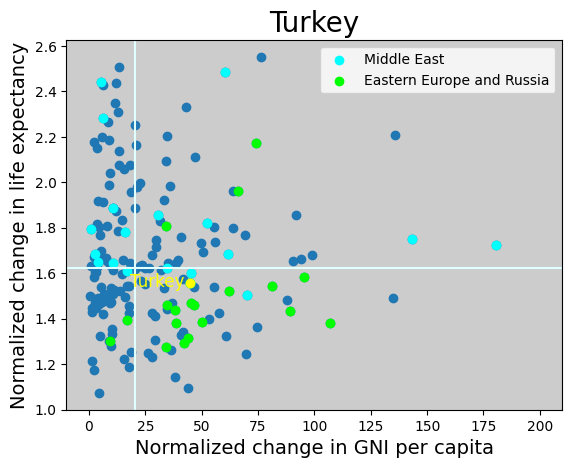

In [16]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(middle_east)]['norm_gni'], 
            y= df[df['country'].isin(middle_east)]['norm_le'],
            color='cyan',
            label='Middle East')
plt.scatter(x=df[df['country'].isin(eastern_europe_russia)]['norm_gni'], 
            y= df[df['country'].isin(eastern_europe_russia)]['norm_le'], 
            color='lime', 
            label='Eastern Europe and Russia')
plt.scatter(x=df[df['country'].isin(['Turkey'])]['norm_gni'], 
            y= df[df['country'].isin(['Turkey'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Turkey', xy= (50, 1.6), xytext= (18,1.54), color='yellow', size =12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Turkey', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/turkey.png')

plt.show()
plt.close(fig)

I don't think this case is very clear at all.  Turkey could easily fit into either Eastern Europe or the Middle East.  

### Timor-Leste: Oceania or Southeast Asia

In [17]:
df[df['country']=='Timor-Leste']

,country,norm_pop,norm_le,norm_gni
177,Timor-Leste,12.750456,1.806401,8.113475


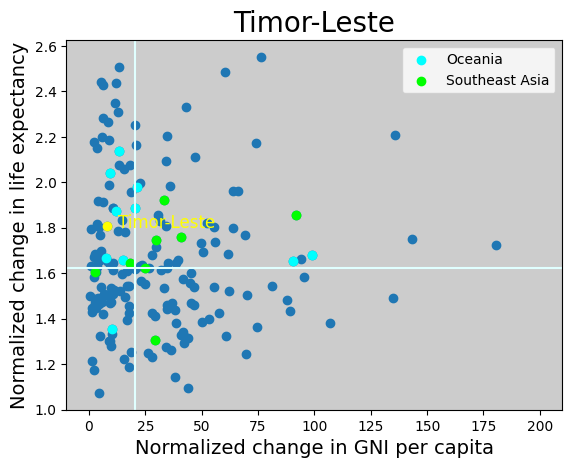

In [18]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(oceania)]['norm_gni'], 
            y= df[df['country'].isin(oceania)]['norm_le'], 
            color='cyan',
            label='Oceania')
plt.scatter(x=df[df['country'].isin(southeast_asia)]['norm_gni'], 
            y= df[df['country'].isin(southeast_asia)]['norm_le'], 
            color='lime', 
            label='Southeast Asia')
plt.scatter(x=df[df['country'].isin(['Timor-Leste'])]['norm_gni'], 
            y= df[df['country'].isin(['Timor-Leste'])]['norm_le'], 
            color='yellow')#,
           #label='Timor-Leste')

plt.annotate('Timor-Leste', xy= (5, 1.8), xytext= (13,1.8), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Timor-Leste', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/timorleste.png')

plt.show()
plt.close(fig)

This is unclear as well.  But this is because Oceania and Southeast Asia appear to have a large overlap in our parameter space.  Regional affliation needs more information.

### Egypt and Sudan: North Africa or Middle East

We will treat each country separately.

In [19]:
df[df['country']=='Egypt']

,country,norm_pop,norm_le,norm_gni
98,Egypt,51.729415,1.457121,17.648118


In [20]:
df[df['country']=='Sudan']

,country,norm_pop,norm_le,norm_gni
52,Sudan,32.053463,1.63328,0.964556


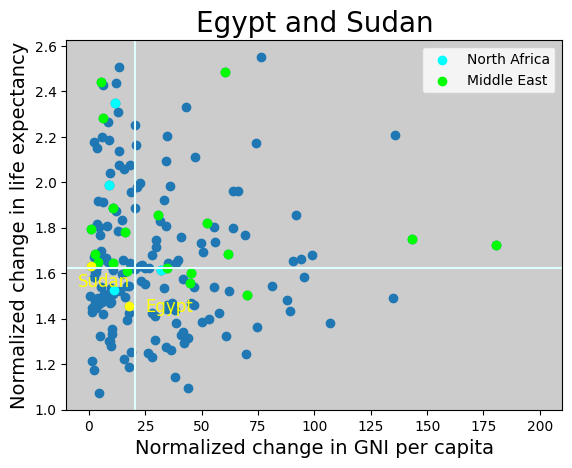

In [21]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(north_africa)]['norm_gni'], 
            y= df[df['country'].isin(north_africa)]['norm_le'], 
            color='cyan',
            label='North Africa')
plt.scatter(x=df[df['country'].isin(middle_east)]['norm_gni'], 
            y= df[df['country'].isin(middle_east)]['norm_le'], 
            color='lime', 
            label='Middle East')
plt.scatter(x=df[df['country'].isin(['Egypt', 'Sudan'])]['norm_gni'], 
            y= df[df['country'].isin(['Egypt', 'Sudan'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Egypt', xy= (19,1.45), xytext= (25, 1.43), color='yellow', size=12)
plt.annotate('Sudan', xy= (1.1, 1.6), xytext= (-5, 1.54), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Egypt and Sudan', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/egypt_sudan.png')

plt.show()
plt.close(fig)

Again, a very wide overlap between North Africa and the Middle East.  Regional affliation cannot be determined with this data.

### South Sudan: North or East Africa
Country in question: South Sudan

In [22]:
df[df['country']=='South Sudan']

,country,norm_pop,norm_le,norm_gni
58,South Sudan,21.413628,1.885581,10.726674


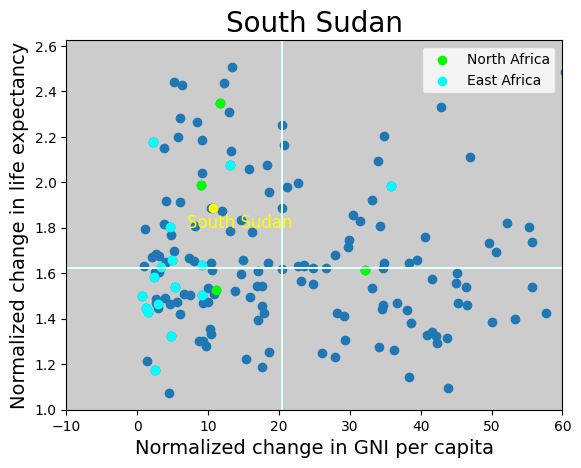

In [23]:
fig, ax= plt.subplots()

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(north_africa)]['norm_gni'], 
            y= df[df['country'].isin(north_africa)]['norm_le'],
            color='lime',
            label='North Africa')
plt.scatter(x=df[df['country'].isin(east_africa)]['norm_gni'], 
            y= df[df['country'].isin(east_africa)]['norm_le'], 
            color='cyan', 
            label='East Africa')
plt.scatter(x=df[df['country'].isin(['South Sudan'])]['norm_gni'], 
            y= df[df['country'].isin(['South Sudan'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('South Sudan', xy= (12,1.9), xytext= (7,1.8), color='yellow', size=12)


ax.set_title('South Sudan', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,60)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/south_sudan.png')

plt.show()
plt.close(fig)

Again the regional overlap is too great to make a determination.  

### Angola: Central or Southern Africa

In [24]:
df[df['country']=='Angola']

,country,norm_pop,norm_le,norm_gni
5,Angola,78.171975,1.917037,4.124327


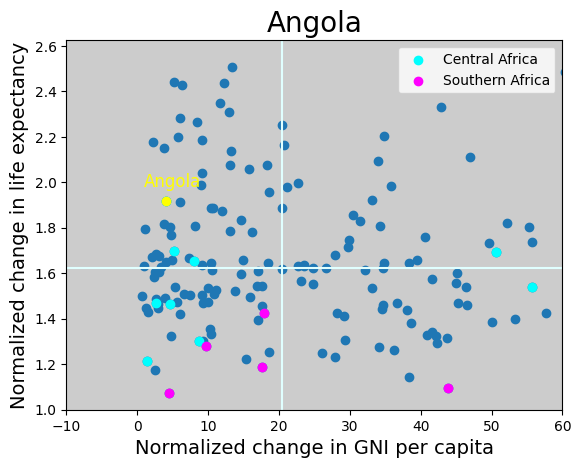

In [25]:
fig, ax= plt.subplots()

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(central_africa)]['norm_gni'], 
            y= df[df['country'].isin(central_africa)]['norm_le'], 
            color='cyan',
            label='Central Africa')
plt.scatter(x=df[df['country'].isin(southern_africa)]['norm_gni'], 
            y= df[df['country'].isin(southern_africa)]['norm_le'], 
            color='magenta', 
            label='Southern Africa')
plt.scatter(x=df[df['country'].isin(['Angola'])]['norm_gni'], 
            y= df[df['country'].isin(['Angola'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Angola', xy= (5,1.9), xytext= (1,1.98), color='yellow', size=12)


ax.set_title('Angola', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,60)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/angola.png')

plt.show()
plt.close(fig)

Angola is definitely closer to the central African countries (in cyan) than the southern African countries (shown in magenta).

### Comoros, Malawi, Mauritius, Zambia, Zimbabwe: Southern or East Africa

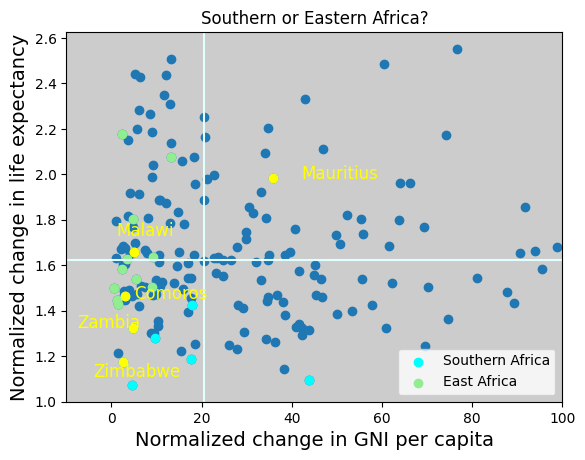

In [26]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(southern_africa)]['norm_gni'], 
            y= df[df['country'].isin(southern_africa)]['norm_le'], 
            color='cyan',
            label='Southern Africa')
plt.scatter(x=df[df['country'].isin(east_africa)]['norm_gni'], 
            y= df[df['country'].isin(east_africa)]['norm_le'], 
            color='lightgreen', 
            label='East Africa')
plt.scatter(x=df[df['country'].isin(['Comoros', 'Malawi', 'Mauritius', 'Zambia', 'Zimbabwe'])]['norm_gni'], 
            y= df[df['country'].isin(['Comoros', 'Malawi', 'Mauritius', 'Zambia', 'Zimbabwe'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Comoros', xy= (3.3, 1.48), xytext= (5,1.45), color='yellow', size=12)
plt.annotate('Malawi', xy= (5.6,1.68), xytext= (1,1.73), color='yellow', size=12)
plt.annotate('Mauritius', xy= (40, 2), xytext= (42, 1.98), color='yellow', size=12)
plt.annotate('Zambia', xy= (5, 1.3), xytext= (-7.5,1.325), color='yellow', size=12)
plt.annotate('Zimbabwe', xy= (2.85, 1.19), xytext= (-4,1.11), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Southern or Eastern Africa?')
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/se_africa.png')

plt.show()
plt.close(fig)

Here the Zimbabwe and Zambia appear to be closer to the other Southern Africa countries (in orange).  While Comoros and Malawi behave more like the other East African countries.  Mauritius appears to behave like neither region, so it will be left uncategorized.  

In [27]:
df[df['country'].isin(['Comoros', 'Malawi', 'Mauritius', 'Zambia', 'Zimbabwe'])].sort_values(by='norm_le')

,country,norm_pop,norm_le,norm_gni
166,Zimbabwe,31.134006,1.172404,2.462397
71,Zambia,68.239651,1.323620,4.765002
137,Comoros,26.644081,1.463396,2.931019
150,Malawi,60.485670,1.660066,4.959317
95,Mauritius,11.290551,1.984495,35.857392


In [28]:
df[df['country'].isin(southern_africa)].sort_values(by='norm_le')

,country,norm_pop,norm_le,norm_gni
9,Lesotho,10.016304,1.073018,4.455290
110,Botswana,34.811563,1.095089,43.829947
28,Eswatini,23.187637,1.188545,17.547809
50,South Africa,49.299401,1.279254,9.668254
152,Namibia,23.251482,1.426235,17.932536


### Somewhere
Country in question: Madagascar

In [29]:
df[df['country']=='Madagascar']

,country,norm_pop,norm_le,norm_gni
17,Madagascar,48.851782,1.582131,2.412329


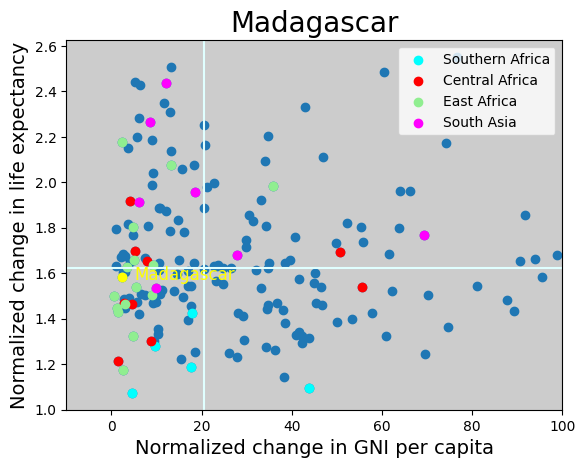

In [30]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(southern_africa)]['norm_gni'], 
            y= df[df['country'].isin(southern_africa)]['norm_le'], 
            color='cyan',
            label='Southern Africa')
plt.scatter(x=df[df['country'].isin(central_africa)]['norm_gni'], 
            y= df[df['country'].isin(central_africa)]['norm_le'], 
            color='red',
            label='Central Africa')
plt.scatter(x=df[df['country'].isin(east_africa)]['norm_gni'], 
            y= df[df['country'].isin(east_africa)]['norm_le'], 
            color='lightgreen', 
            label='East Africa')
plt.scatter(x=df[df['country'].isin(south_asia)]['norm_gni'], 
            y= df[df['country'].isin(south_asia)]['norm_le'], 
            color='magenta', 
            label='South Asia')
plt.scatter(x=df[df['country'].isin(['Madagascar'])]['norm_gni'], 
            y= df[df['country'].isin(['Madagascar'])]['norm_le'], 
            color='yellow')#,
            #label='Countries of Uncertain Region')

plt.annotate('Madagascar', xy= (2.85, 1.6), xytext= (5,1.57), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Madagascar', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/madagascar.png')

plt.show()
plt.close(fig)

It seems pretty clear that Madagascar belongs with either East Africa or Central Africa.  It definitely does not fit with southern Africa.  However it is on the outer edges of the South Asia parameter space.  